# Predictive Analysis -Solo Traveler Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pyplot
%matplotlib inline
from sklearn.metrics import mean_squared_error
import random
import itertools
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
#plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import math

In [2]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss

In [3]:
data = pd.read_csv('data\allData.csv')


imported count of group and solo travelers and converted the date format from string to date

In [4]:
len(data)

153

Taking data of solo traverers count. Also after having applied the ARIMA model initially, noticed that the dates being predicted are negative values. Also given data is non-stationary causing impact on the ARIMA model. To avoid that situation, we have considered the logarithmic values of all data.

In [11]:
data['Date'] = pd.to_datetime(data['Date'])

In [12]:
data.head()

Solo  Group       Date
0  1852    240 2019-08-01
1  1100    503 2019-08-02
2  1491    267 2019-08-03
3  1434    128 2019-08-04
4  1054    612 2019-08-05

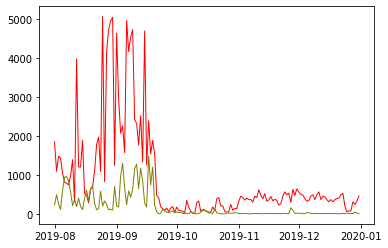

In [13]:
plt.plot( 'Date', 'Solo', data=data, marker='',  color='red', linewidth=1)
plt.plot( 'Date', 'Group', data=data, marker='', color='olive', linewidth=1)

plt.show()


In [15]:


solo_data = np.log(data[['Solo']].copy())
solo_data

Solo
0    7.524021
1    7.003065
2    7.307202
3    7.268223
4    6.960348
..        ...
148  4.477337
149  5.777652
150  5.537334
151  5.831882
152  6.154858

[153 rows x 1 columns]

## ARIMA MODEL : Solo Data

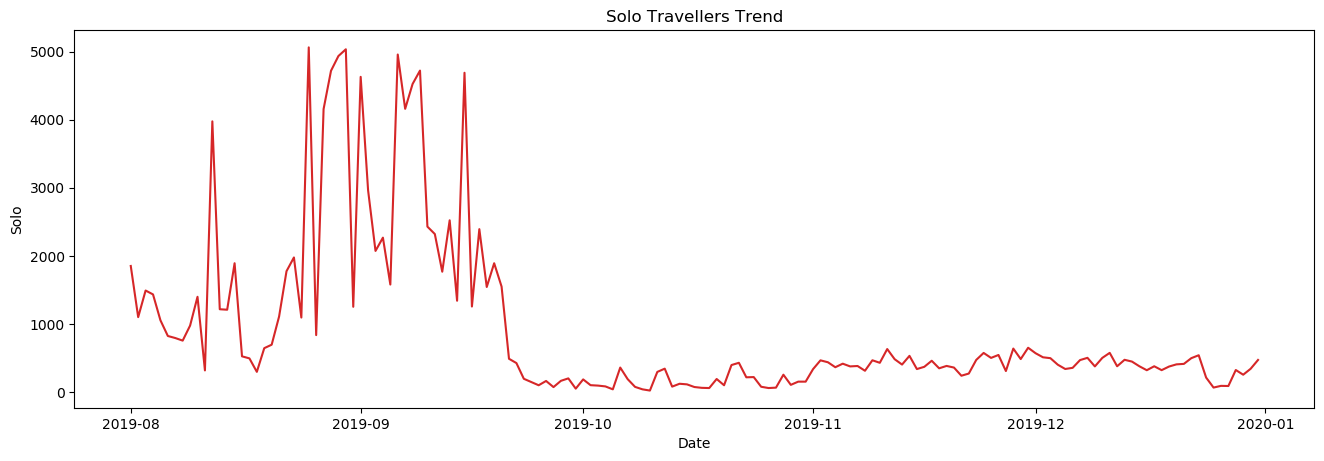

In [16]:
def plot_df(data, x, y, title="", xlabel='Date', ylabel='Solo', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data, y=data['Solo'], x=data['Date'], title='Solo Travellers Trend')

In [10]:
X=np.array(solo_data['Solo'])
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
# finding the optimal set of parameters that yields the best performance for the model
# p,d,q : parameters for seasonality, trend and noise
d =q=  range(0, 2)
p= range(0,20)
pdq = list(itertools.product(p, d, q))
final_aic =float('inf')
final_pqd = (0,0,0)
for param in pdq:
    predictions = list()
    #for t in range(len(test)):
    model = ARIMA(history, order=param)
    #model = ARIMA(np.array(group_data['Group']),order=param)
    model_fit = model.fit(disp=0)
    #output = model_fit.forecast()
    #yhat = output[0]
    #predictions.append(yhat)
    #obs = test[t]
    #history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
    print('ARIMA{} - AIC: {}'.format(param, model_fit.aic))
    if model_fit.aic < final_aic:
        final_aic = model_fit.aic
        final_pqd = param


ARIMA(0, 0, 0) - AIC: 358.32182683277097
ARIMA(0, 0, 1) - AIC: 304.9150800534151
ARIMA(0, 1, 0) - AIC: 246.4219773077318
ARIMA(0, 1, 1) - AIC: 222.7218486147745
ARIMA(1, 0, 0) - AIC: 242.85850020862824
ARIMA(1, 0, 1) - AIC: 225.9377282544773
ARIMA(1, 1, 0) - AIC: 225.80707230970702
ARIMA(1, 1, 1) - AIC: 224.61253552921082
ARIMA(2, 0, 0) - AIC: 227.30638280614602
ARIMA(2, 0, 1) - AIC: 227.5888974266048
ARIMA(2, 1, 0) - AIC: 225.60440552140716
ARIMA(2, 1, 1) - AIC: 225.84639638214776
ARIMA(3, 0, 0) - AIC: 227.910261597825
ARIMA(3, 0, 1) - AIC: 222.37926305551179
ARIMA(3, 1, 0) - AIC: 227.55719573023458
ARIMA(3, 1, 1) - AIC: 227.8444554820283
ARIMA(4, 0, 0) - AIC: 229.90821228188952
ARIMA(4, 0, 1) - AIC: 224.35441715322938
ARIMA(4, 1, 0) - AIC: 223.25126047578092
ARIMA(4, 1, 1) - AIC: 223.8588929812425
ARIMA(5, 0, 0) - AIC: 226.5941768015725
ARIMA(5, 0, 1) - AIC: 226.99402910070827
ARIMA(5, 1, 0) - AIC: 224.03564694727578
ARIMA(5, 1, 1) - AIC: 225.79618798171057
ARIMA(6, 0, 0) - AIC: 226.

In [12]:
print("Best AIC results:", final_aic," obtained at :", final_pqd )


Best AIC results: 222.37926305551179  obtained at : (3, 0, 1)


In [13]:
size

100

In [17]:
X=np.array(solo_data['Solo'])
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

predictions = list()
for t in range(len(test)):
    #model = ARIMA(history, order=param)
    model = ARIMA(history,order=final_pqd)# applying the optimal parameters to get the final results

    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % math.sqrt(error))
print("data range:",max(group_data['Group'])-min(group_data['Group']))
print("data average:",np.mean(group_data['Group']))
#plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=5.712769, expected=6.144186
predicted=6.197470, expected=6.061457
predicted=5.904235, expected=6.447306
predicted=6.522071, expected=6.177944
predicted=6.040430, expected=5.998937
predicted=6.371193, expected=6.274762
predicted=5.930018, expected=5.820083
predicted=6.254174, expected=5.913503
predicted=5.744938, expected=6.129050
predicted=6.233280, expected=5.852202
predicted=5.817001, expected=5.948035
predicted=6.151475, expected=5.883322
predicted=5.738740, expected=5.476464
predicted=5.911092, expected=5.602119
predicted=5.448488, expected=6.154858
predicted=6.129323, expected=6.352629
predicted=6.077070, expected=6.216606
predicted=6.459868, expected=6.298949
predicted=6.103917, expected=5.730100
predicted=6.144010, expected=6.458338
predicted=6.083437, expected=6.182085
predicted=6.326983, expected=6.476972
predicted=6.354689, expected=6.345636
predicted=6.366918, expected=6.234411
predicted=6.318829, expected=6.208590
predicted=6.201901, expected=5.993961
predicted=6.

NameError: name 'group_data' is not defined

In [19]:
model_fit.summary()# extracting summary of the fitted model

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  152
Model:                     ARMA(3, 1)   Log Likelihood                -138.753
Method:                       css-mle   S.D. of innovations              0.594
Date:                Tue, 12 May 2020   AIC                            289.506
Time:                        11:06:45   BIC                            307.649
Sample:                             0   HQIC                           296.877
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2050      0.437     14.192      0.000       5.348       7.062
ar.L1.y       -0.4192      0.073     -5.759      0.000      -0.562      -0.277
ar.L2.y        0.7936      0.048     16.460      0.000       0.699       0.888
ar.L3.y        0.4209      0.073      5.761      0.000       0.278       0.564
ma.L1.y        0.9999      0.019     53.952      0.000       0.964       1.036
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0789           -0.0000j            1.0789           -0.0000
AR.2           -1.4822           -0.0725j            1.4840           -0.4922
AR.3           -1.4822           +0.0725j            1.4840            0.4922
MA.1           -1.0001           +0.0000j            1.0001            0.5000
-----------------------------------------------------------------------------
"""

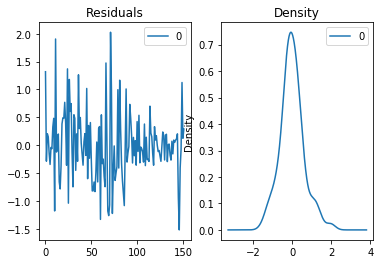

In [20]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

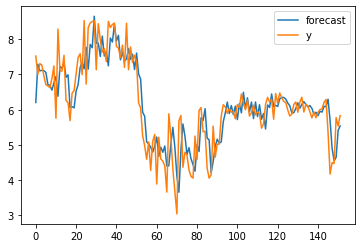

In [21]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

### Consolidated Results of ARIMA Model

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  153
Model:                     ARMA(3, 1)   Log Likelihood                -139.217
Method:                       css-mle   S.D. of innovations              0.593
Date:                Fri, 08 May 2020   AIC                            290.434
Time:                        19:22:06   BIC                            308.617
Sample:                             0   HQIC                           297.821
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2165      0.434     14.334      0.000       5.366       7.066
ar.L1.y       -0.4182      0.073     -5.765      0.000      -0.560      -0.276
ar.L2.y        0.7924      0.048     16.521      0.0

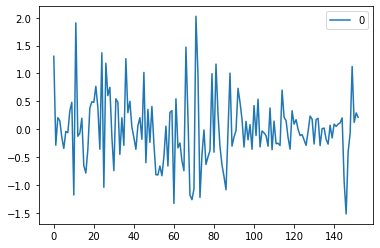

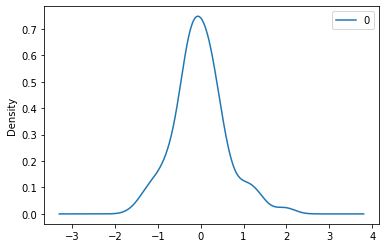

                0
count  153.000000
mean    -0.011703
std      0.607283
min     -1.522269
25%     -0.336062
50%     -0.041857
75%      0.290566
max      2.026027
predicted=5.712769, expected=6.144186
predicted=6.197470, expected=6.061457
predicted=5.904235, expected=6.447306
predicted=6.522071, expected=6.177944
predicted=6.040430, expected=5.998937
predicted=6.371193, expected=6.274762
predicted=5.930018, expected=5.820083
predicted=6.254174, expected=5.913503
predicted=5.744938, expected=6.129050
predicted=6.233280, expected=5.852202
predicted=5.817001, expected=5.948035
predicted=6.151475, expected=5.883322
predicted=5.738740, expected=5.476464
predicted=5.911092, expected=5.602119
predicted=5.448488, expected=6.154858
predicted=6.129323, expected=6.352629
predicted=6.077070, expected=6.216606
predicted=6.459868, expected=6.298949
predicted=6.103917, expected=5.730100
predicted=6.144010, expected=6.458338
predicted=6.083437, expected=6.182085
predicted=6.326983, expected=6.476972
pr

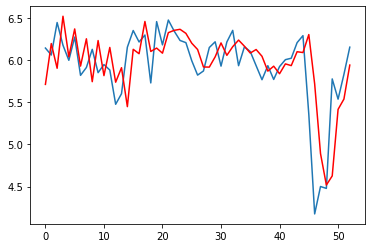

In [19]:
model = ARIMA(np.array(solo_data['Solo']), order=final_pqd)
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())
X=np.array(solo_data['Solo'])
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=final_pqd)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#### Checking the stationary nature of our data

In [22]:
# ADF Test
result = adfuller(np.array(solo_data['Solo']), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.835291729719939
p-value: 0.3630863745905071
Critial Values:
   1%, -3.4756368462466662
Critial Values:
   5%, -2.8814104466172608
Critial Values:
   10%, -2.5773652982553568


In [23]:
# KPSS Test
result = kpss(np.array(solo_data['Solo']), regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.402494
p-value: 0.076080
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


null hypothesis : time series possesses a unit root and is non-stationary

p-value in ADF Test : 0.28 


if the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.


=> given data is non stationary.


Need to de-trend the data otherwise by subtracting the mean from all data

#### Checking for Data Seasonility ::

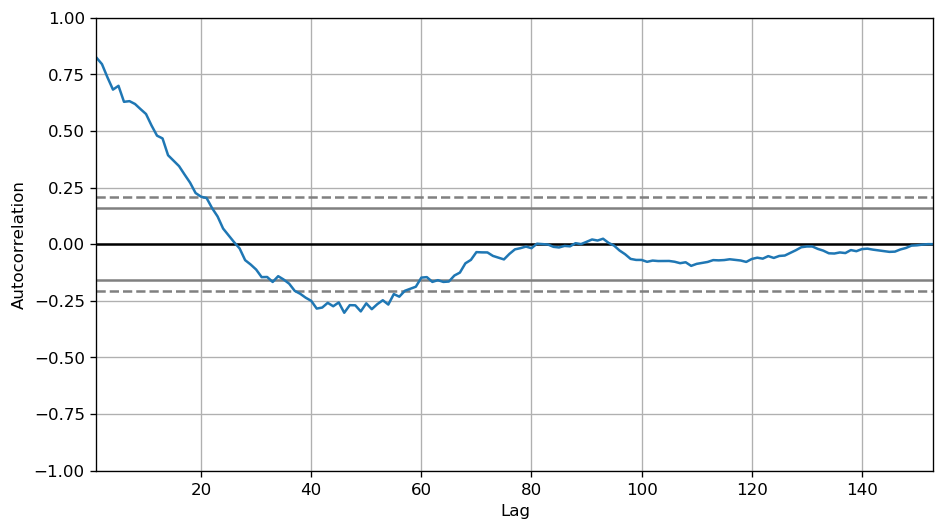

In [24]:
from pandas.plotting import autocorrelation_plot


# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(np.array(solo_data['Solo']).tolist())

No Seasonality trend observed in the whole data

### Forecasting for future

In [25]:
model_fit.predict(start =101,end= 154)

array([6.17391792, 5.91103479, 6.49535967, 6.03363012, 6.33750095,
       5.93864961, 6.21745912, 5.74975705, 6.21957048, 5.8056838 ,
       6.14194113, 5.73098232, 5.89456855, 5.45414712, 6.13599439,
       6.06447852, 6.44709597, 6.08998227, 6.12646915, 6.09074555,
       6.3064111 , 6.34866969, 6.34921689, 6.30479875, 6.19053426,
       6.11358645, 5.9107623 , 5.91425779, 6.03750642, 6.19581323,
       6.0440409 , 6.15863067, 6.23003272, 6.14858731, 6.08319091,
       6.11706938, 6.03669438, 5.8640585 , 5.92836876, 5.8327514 ,
       5.95584113, 5.93318834, 6.09497281, 6.08868468, 6.29670674,
       5.69685047, 4.90675789, 4.54698421, 4.65224741, 5.41375703,
       5.54145192, 5.94213026, 5.73810403, 6.035088  ])

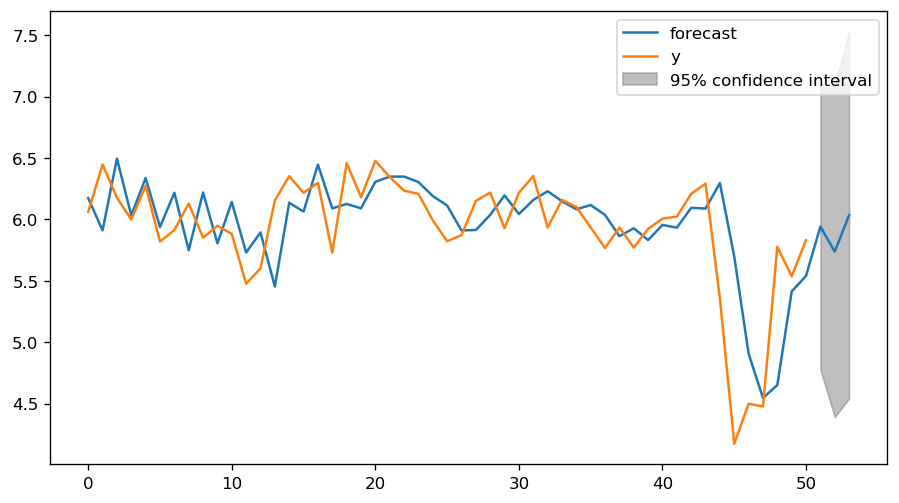

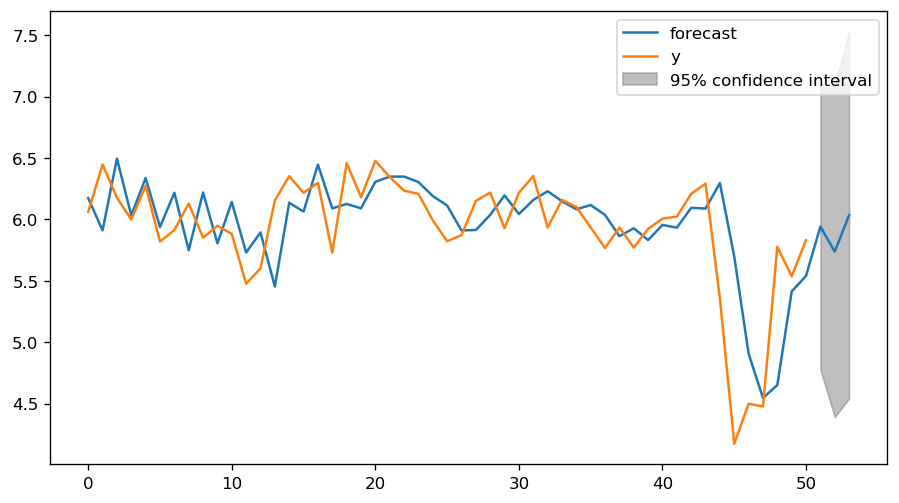

In [26]:
model_fit.plot_predict(start=101,end=154)

#### Forecast for the next 30 days

In [27]:
forecasted_solo_data = np.array(model_fit.forecast(steps=30)[0])
forecasted_solo_data

array([5.94213026, 5.73810403, 6.035088  , 5.79507806, 6.04550493,
       5.87504663, 6.04422598, 5.94342784, 6.04820055, 5.99548896,
       6.05830909, 6.03423843, 6.07199727, 6.06350507, 6.08689912,
       6.08624412, 6.10150957, 6.10443599, 6.1150478 , 6.11934618,
       6.12719713, 6.13178311, 6.13789995, 6.14227918, 6.14722758,
       6.15120274, 6.15530628, 6.1588232 , 6.16227833, 6.16534786])

#### Converting logarithmic predictions to integer values by taking a exponential value -1

In [29]:
temp =np.ceil(np.exp(forecasted_solo_data)-1)
forecasted_solo_January =[]
for x in temp:
    forecasted_solo_January.append(int(x))
    print(int(x))

380
310
417
328
422
356
421
381
423
401
427
417
433
429
440
439
446
447
452
454
458
460
463
465
467
469
471
472
474
475


Considered other models, but the mean of these models is varies from 0 hugely and hence is not ideal for our data

## AR MODEL : Solo Data

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  153
Model:                     AutoReg(1)   Log Likelihood                -160.522
Method:               Conditional MLE   S.D. of innovations              0.696
Date:                Tue, 12 May 2020   AIC                             -0.686
Time:                        11:18:56   BIC                             -0.627
Sample:                             1   HQIC                            -0.662
                                  153                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trend          0.0013      0.001      1.211      0.226      -0.001       0.003
y.L1           0.9770      0.015     63.242      0.000       0.947       1.007
                                    Roots           

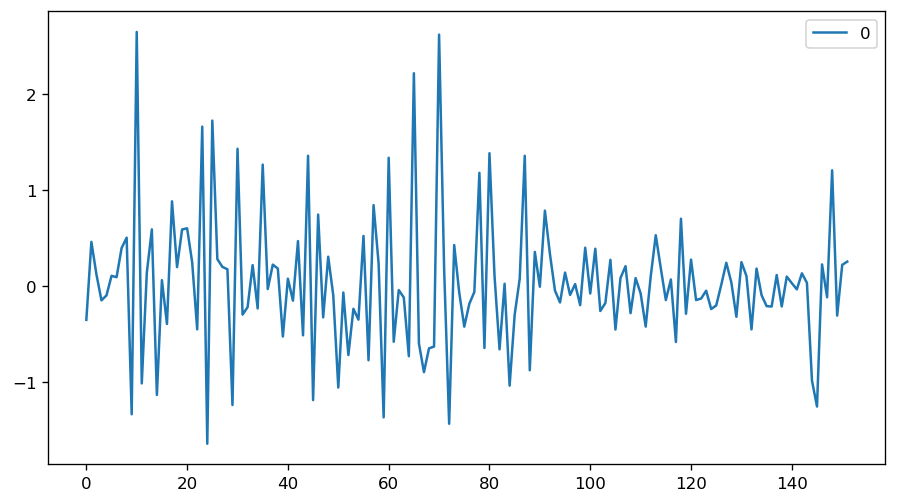

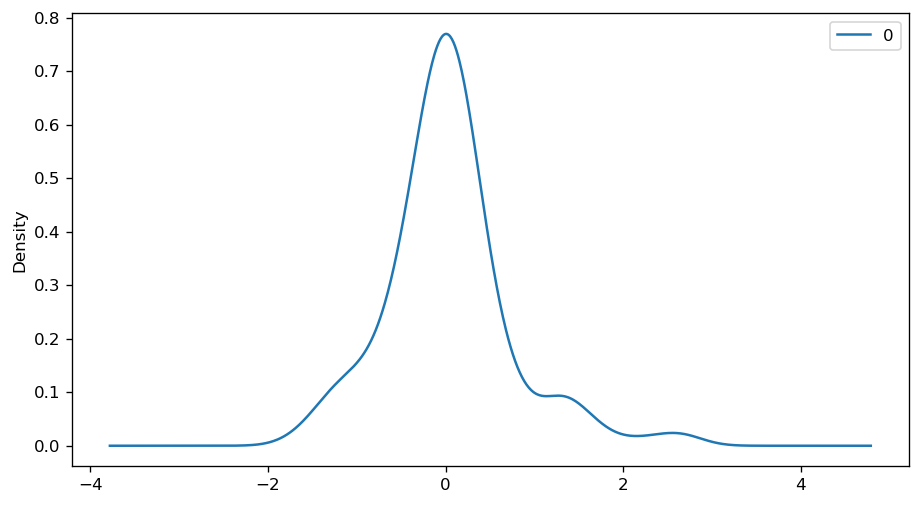

                0
count  152.000000
mean     0.030606
std      0.697301
min     -1.639040
25%     -0.295859
50%      0.004837
75%      0.249884
max      2.646219
predicted=5.812123, expected=6.144186
predicted=6.148803, expected=6.061457
predicted=6.079274, expected=6.447306
predicted=6.403041, expected=6.177944
predicted=6.177413, expected=5.998937
predicted=6.027218, expected=6.274762
predicted=6.258346, expected=5.820083
predicted=5.877249, expected=5.913503
predicted=5.955065, expected=6.129050
predicted=6.135395, expected=5.852202
predicted=5.903309, expected=5.948035
predicted=5.983173, expected=5.883322
predicted=5.928591, expected=5.476464
predicted=5.586715, expected=5.602119
predicted=5.691142, expected=6.154858
predicted=6.153876, expected=6.352629
predicted=6.319398, expected=6.216606
predicted=6.205860, expected=6.298949
predicted=6.274845, expected=5.730100
predicted=5.799261, expected=6.458338
predicted=6.407330, expected=6.182085
predicted=6.177184, expected=6.476972
pr

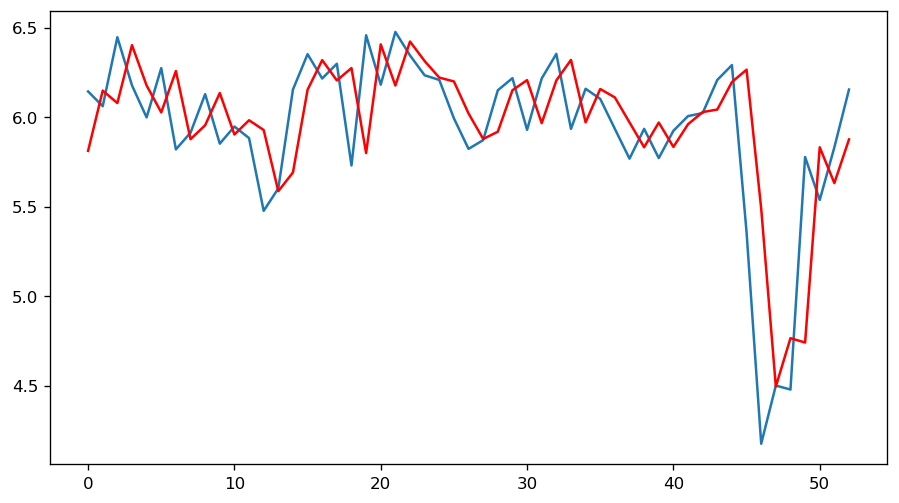

In [30]:


# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random
# contrived dataset

# fit model
model_ar = AutoReg(np.array(solo_data['Solo']), lags=1,trend='t')
model_fit_ar = model_ar.fit()
print(model_fit_ar.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit_ar.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())
X=np.array(solo_data['Solo'])
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model_ar = AutoReg(history, lags=1)
    model_fit_ar = model_ar.fit()
    output = model_fit_ar.predict(len(data), len(data))
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## AR MODEL : Solo Data

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  152
Model:                     AutoReg(1)   Log Likelihood                -153.796
Method:               Conditional MLE   S.D. of innovations              0.670
Date:                Tue, 12 May 2020   AIC                             -0.761
Time:                        11:18:57   BIC                             -0.701
Sample:                             1   HQIC                            -0.737
                                  152                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0715      0.285      3.759      0.000       0.513       1.630
y.L1           0.8238      0.046     18.099      0.000       0.735       0.913
                                    Roots           

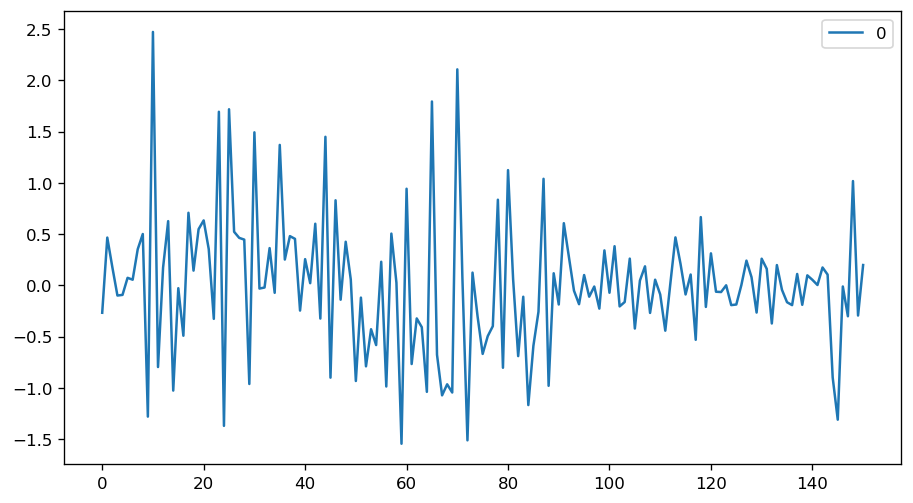

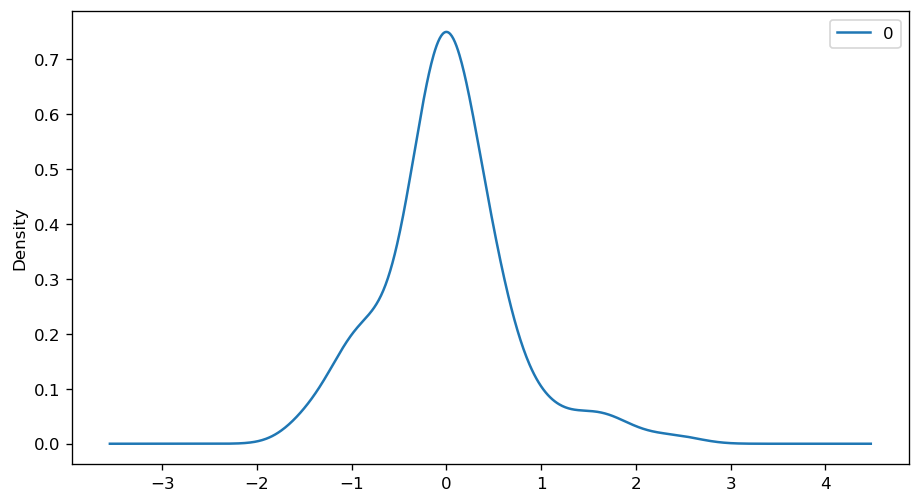

                  0
count  1.510000e+02
mean  -1.882232e-15
std    6.722685e-01
min   -1.544646e+00
25%   -3.130430e-01
50%   -1.070988e-02
75%    2.696285e-01
max    2.472366e+00
predicted=5.876042, expected=6.144186
predicted=5.876042, expected=6.061457
predicted=5.876042, expected=6.447306
predicted=5.876042, expected=6.177944
predicted=5.876042, expected=5.998937
predicted=5.876042, expected=6.274762
predicted=5.876042, expected=5.820083
predicted=5.876042, expected=5.913503
predicted=5.876042, expected=6.129050
predicted=5.876042, expected=5.852202
predicted=5.876042, expected=5.948035
predicted=5.876042, expected=5.883322
predicted=5.876042, expected=5.476464
predicted=5.876042, expected=5.602119
predicted=5.876042, expected=6.154858
predicted=5.876042, expected=6.352629
predicted=5.876042, expected=6.216606
predicted=5.876042, expected=6.298949
predicted=5.876042, expected=5.730100
predicted=5.876042, expected=6.458338
predicted=5.876042, expected=6.182085
predicted=5.876042, ex

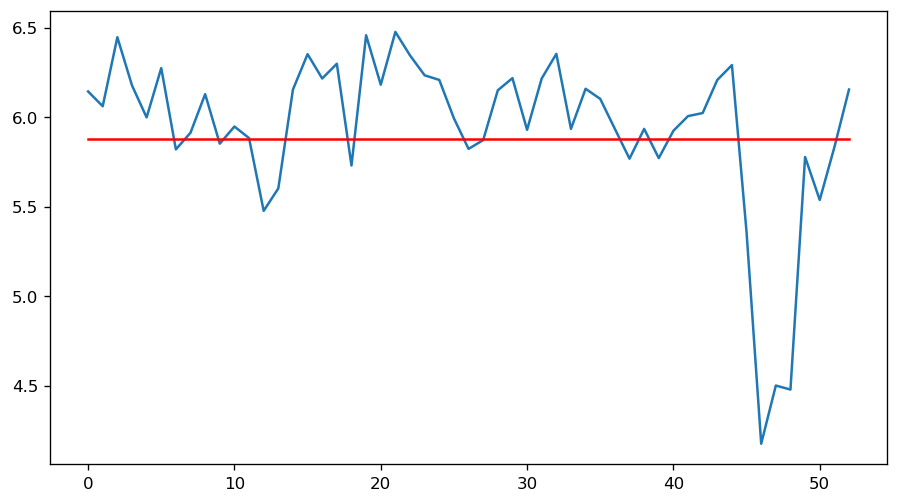

In [31]:
from statsmodels.tsa.arima_model import ARMA
from random import random

# fit model
model_arma = ARMA(np.array(solo_data['Solo']),order=(0, 1) )
model_fit_arma = model_ar.fit()
print(model_fit_ar.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit_ar.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())
X=np.array(solo_data['Solo'])
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model_arma = ARMA(history, order=(0, 1))
    model_fit_arma = model_arma.fit()
    output = model_fit_ar.predict(len(data), len(data))
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()